In [59]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [60]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [61]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [62]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [63]:
quic_data = "./data/VM/quic_perf/output_quic.csv"

In [64]:
t = pd.read_csv(quic_data,';')

In [65]:
t = t.dropna()

In [66]:
asn_data = "./data/VM/quic_perf/asinfo.csv"

In [67]:
asn = pd.read_csv(asn_data, ',')

In [68]:
asn.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo    ASName                                                        
15169   GOOGLE - Google LLC                                               3863
15133   EDGECAST - MCI Communications Services                             689
55293   A2HOSTING - A2 Hosting                                             178
203226  IHCRU - Internet-Hosting Ltd                                        82
16276   OVH - OVH SAS                                                       75
                                                                          ... 
42868   CMBM - Niobe Bilisim Teknolojileri Yazilim San. Tic. Ltd. Sti.       1
25184   AFRANET - Afranet                                                    1
58487   RUMAHWEB-AS-ID Rumahweb Indonesia CV.                                1
22923   YESUP-389 - Yesup Ecommerce Solutions Inc.                           1
701     UUNET - MCI Communications Services                                  1
Length: 128, dtype: int64

In [69]:
asn.count()

Url       5721
Ip        5721
ASNo      5721
ASName    5721
Lat       5721
Lon       5721
dtype: int64

In [70]:
asn.head()

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.0dayrox2.blogspot.com,172.217.22.33,15169,GOOGLE - Google LLC,-122.0574,37.4192
1,www.0dayrox.blogspot.com,172.217.22.33,15169,GOOGLE - Google LLC,-122.0574,37.4192
2,www.100leccionesdeguitarra.blogspot.com,172.217.22.33,15169,GOOGLE - Google LLC,-122.0574,37.4192
3,www.100negocios.com,66.198.240.11,55293,A2HOSTING - A2 Hosting,-83.7409,42.2776
4,www.101apps.co.za,89.145.92.16,29017,GYRON - Gyron Internet Ltd,-0.1224,51.4964


In [71]:
t = t.join(asn.set_index('Url'), on='Url', rsuffix='_right')

In [72]:
t = t.drop('Ip_right', axis=1)

In [73]:
t.count()

TimeOfMeasurement              19954729
Url                            19954729
Path                           19954729
Ip                             19954729
Port                           19954729
DNSTime                        19954729
ConnectionEstablishmentTime    19954729
TTFB                           19954729
TotalDownloadTime              19954729
HttpResponse                   19954729
Protocol                       19954729
ASNo                           19954729
ASName                         19954729
Lat                            19954729
Lon                            19954729
dtype: int64

In [74]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192
1,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043,15169,GOOGLE - Google LLC,-122.0574,37.4192
2,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039,15169,GOOGLE - Google LLC,-122.0574,37.4192
3,1.542733e+09,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192
4,1.542733e+09,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192


In [75]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [76]:
t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [77]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,Tue Nov 20 18:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192
1,Tue Nov 20 18:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043,15169,GOOGLE - Google LLC,-122.0574,37.4192
2,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039,15169,GOOGLE - Google LLC,-122.0574,37.4192
3,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192
4,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192


In [78]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
20843625,Sun Jan 6 14:23:16 2019,www.zynamics.com,/,172.217.18.14,443.0,0.490,37.425,80.387,84.678,200.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192
20843626,Sun Jan 6 14:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,1.248,37.485,80.611,84.831,200.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192
20843627,Sun Jan 6 14:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.516,38.203,82.999,87.418,200.0,Q043,15169,GOOGLE - Google LLC,-122.0574,37.4192
20843628,Sun Jan 6 14:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.556,37.440,80.615,84.861,200.0,Q039,15169,GOOGLE - Google LLC,-122.0574,37.4192
20843629,Sun Jan 6 14:23:16 2019,www.zynamics.com,/,2a00:1450:4001:80b::200e,443.0,0.550,37.648,80.916,85.091,200.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192


In [79]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [80]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [81]:
#quic4 = quic4[quic4['HttpResponse'] == 200.0]
#quic6 = quic6[quic6['HttpResponse'] == 200.0]

In [82]:
quic4.count()

TimeOfMeasurement              12158747
Url                            12158747
Path                           12158747
Ip                             12158747
Port                           12158747
DNSTime                        12158747
ConnectionEstablishmentTime    12158747
TTFB                           12158747
TotalDownloadTime              12158747
HttpResponse                   12158747
Protocol                       12158747
ASNo                           12158747
ASName                         12158747
Lat                            12158747
Lon                            12158747
dtype: int64

In [83]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,Tue Nov 20 18:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,43.973,116.866,302.035,306.207,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192
1,Tue Nov 20 18:00:03 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.615,37.014,826.640,830.814,301.0,Q043,15169,GOOGLE - Google LLC,-122.0574,37.4192
2,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.499,36.260,223.602,227.803,301.0,Q039,15169,GOOGLE - Google LLC,-122.0574,37.4192
3,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,216.58.214.33,443.0,0.496,42.983,228.951,233.100,301.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192
8,Tue Nov 20 18:00:05 2018,www.0dayrox.blogspot.com,/,216.58.214.33,443.0,17.386,37.093,194.005,198.128,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192


In [84]:
quic6.count()

TimeOfMeasurement              7795982
Url                            7795982
Path                           7795982
Ip                             7795982
Port                           7795982
DNSTime                        7795982
ConnectionEstablishmentTime    7795982
TTFB                           7795982
TotalDownloadTime              7795982
HttpResponse                   7795982
Protocol                       7795982
ASNo                           7795982
ASName                         7795982
Lat                            7795982
Lon                            7795982
dtype: int64

In [85]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
4,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.506,35.771,244.348,248.551,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192
5,Tue Nov 20 18:00:04 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.543,38.079,245.425,249.597,301.0,Q043,15169,GOOGLE - Google LLC,-122.0574,37.4192
6,Tue Nov 20 18:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.548,38.785,238.196,242.768,301.0,Q039,15169,GOOGLE - Google LLC,-122.0574,37.4192
7,Tue Nov 20 18:00:05 2018,www.0dayrox2.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.685,37.735,261.156,265.396,301.0,Q035,15169,GOOGLE - Google LLC,-122.0574,37.4192
12,Tue Nov 20 18:00:06 2018,www.0dayrox.blogspot.com,/,2a00:1450:4001:821::2001,443.0,0.468,36.324,212.228,216.408,301.0,Q044,15169,GOOGLE - Google LLC,-122.0574,37.4192


In [86]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo    ASName                                                      
15169   GOOGLE - Google LLC                                             16303245
15133   EDGECAST - MCI Communications Services                           1503493
55293   A2HOSTING - A2 Hosting                                            353247
203226  IHCRU - Internet-Hosting Ltd                                      290107
24940   HETZNER-AS - Hetzner Online GmbH                                  130723
                                                                          ...   
22923   YESUP-389 - Yesup Ecommerce Solutions Inc.                           642
61173   GWSN-AS - Green Web Samaneh Novin Co Ltd                             529
31229   PL-BEYOND-AS - E24 Sp. z o.o.                                        498
205192  OMURTECH - Hacer Yavuz trading as Omur Bilisim Teknolojileri         134
18501   CODERO-DFW - Codero                                                   93
Length: 120, dtype: int64

In [87]:
quic15169 = quic4.loc[t['ASNo'] == 15169]
quic15133 = quic4.loc[t['ASNo'] == 15133]
quic203226= quic4.loc[t['ASNo'] == 203226]
quic55293 = quic4.loc[t['ASNo'] == 55293]
quic16276 = quic4.loc[t['ASNo'] == 16276]

In [31]:
quic15169.count()

TimeOfMeasurement              8643117
Url                            8643117
Path                           8643117
Ip                             8643117
Port                           8643117
DNSTime                        8643117
ConnectionEstablishmentTime    8643117
TTFB                           8643117
TotalDownloadTime              8643117
HttpResponse                   8643117
Protocol                       8643117
ASNo                           8643117
ASName                         8643117
Lat                            8643117
Lon                            8643117
dtype: int64

In [32]:
quic15133.count()

TimeOfMeasurement              1503493
Url                            1503493
Path                           1503493
Ip                             1503493
Port                           1503493
DNSTime                        1503493
ConnectionEstablishmentTime    1503493
TTFB                           1503493
TotalDownloadTime              1503493
HttpResponse                   1503493
Protocol                       1503493
ASNo                           1503493
ASName                         1503493
Lat                            1503493
Lon                            1503493
dtype: int64

In [33]:
quic203226.count()

TimeOfMeasurement              169151
Url                            169151
Path                           169151
Ip                             169151
Port                           169151
DNSTime                        169151
ConnectionEstablishmentTime    169151
TTFB                           169151
TotalDownloadTime              169151
HttpResponse                   169151
Protocol                       169151
ASNo                           169151
ASName                         169151
Lat                            169151
Lon                            169151
dtype: int64

In [88]:
quic55293.count()

TimeOfMeasurement              353247
Url                            353247
Path                           353247
Ip                             353247
Port                           353247
DNSTime                        353247
ConnectionEstablishmentTime    353247
TTFB                           353247
TotalDownloadTime              353247
HttpResponse                   353247
Protocol                       353247
ASNo                           353247
ASName                         353247
Lat                            353247
Lon                            353247
dtype: int64

In [35]:
quic16276.count()

TimeOfMeasurement              117534
Url                            117534
Path                           117534
Ip                             117534
Port                           117534
DNSTime                        117534
ConnectionEstablishmentTime    117534
TTFB                           117534
TotalDownloadTime              117534
HttpResponse                   117534
Protocol                       117534
ASNo                           117534
ASName                         117534
Lat                            117534
Lon                            117534
dtype: int64

In [36]:
quic15169_6 = quic6.loc[t['ASNo'] == 15169]
quic15133_6 = quic6.loc[t['ASNo'] == 15133]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]
quic55293_6 = quic6.loc[t['ASNo'] == 55293]
quic16276_6 = quic6.loc[t['ASNo'] == 16276]

In [37]:
quic15169_6.count()

TimeOfMeasurement              7660128
Url                            7660128
Path                           7660128
Ip                             7660128
Port                           7660128
DNSTime                        7660128
ConnectionEstablishmentTime    7660128
TTFB                           7660128
TotalDownloadTime              7660128
HttpResponse                   7660128
Protocol                       7660128
ASNo                           7660128
ASName                         7660128
Lat                            7660128
Lon                            7660128
dtype: int64

In [38]:
quic15133.count()

TimeOfMeasurement              1503493
Url                            1503493
Path                           1503493
Ip                             1503493
Port                           1503493
DNSTime                        1503493
ConnectionEstablishmentTime    1503493
TTFB                           1503493
TotalDownloadTime              1503493
HttpResponse                   1503493
Protocol                       1503493
ASNo                           1503493
ASName                         1503493
Lat                            1503493
Lon                            1503493
dtype: int64

In [39]:
x = Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [40]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:52.233000

90th Percentile:206.612000

99th Percentile:331.246000

25th Percentile:45.005000

75th Percentile:201.599000

20th Percentile:52.233000

40th Percentile:206.612000

60th Percentile:331.246000

80th Percentile:45.005000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.438000

90th Percentile:38.133000

99th Percentile:55.415000

25th Percentile:35.810000

75th Percentile:37.085000

20th Percentile:36.438000

40th Percentile:38.133000

60th Percentile:55.415000

80th Percentile:35.810000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:94.397000

90th Percentile:117.870000

99th Percentile:196.408000

25th Percentile:91.970000

75th Percentile:111.755000

20th Percentile:94.397000

40th Percentile:117.870000

60th Percentile:196.40

In [189]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


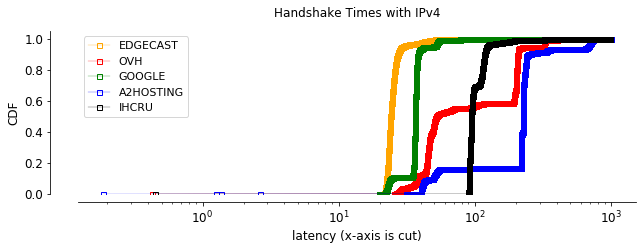

In [41]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
##ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_IPv4_asno.png', format='png', bbox_inches='tight')


In [41]:
x = Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [42]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:276.384000

90th Percentile:604.118000

99th Percentile:931.598000

25th Percentile:71.097000

75th Percentile:334.460000

20th Percentile:276.384000

40th Percentile:604.118000

60th Percentile:931.598000

80th Percentile:71.097000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:208.891000

90th Percentile:441.493000

99th Percentile:865.092000

25th Percentile:173.424000

75th Percentile:243.720000

20th Percentile:208.891000

40th Percentile:441.493000

60th Percentile:865.092000

80th Percentile:173.424000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:167.681000

90th Percentile:480.988000

99th Percentile:919.692000

25th Percentile:138.842000

75th Percentile:242.348000

20th Percentile:167.681000

40th Percentile:480.988000

60th Per

In [191]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

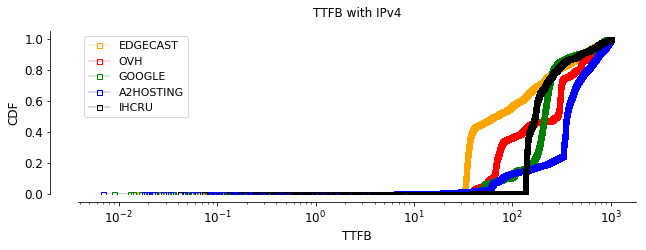

In [40]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asno.png', format='png', bbox_inches='tight')

In [43]:
x = Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [44]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:267.037000

90th Percentile:685.673000

99th Percentile:968.553000

25th Percentile:76.706000

75th Percentile:404.549000

20th Percentile:267.037000

40th Percentile:685.673000

60th Percentile:968.553000

80th Percentile:76.706000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:214.001000

90th Percentile:522.283000

99th Percentile:880.823000

25th Percentile:179.518000

75th Percentile:251.136000

20th Percentile:214.001000

40th Percentile:522.283000

60th Percentile:880.823000

80th Percentile:179.518000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:174.133000

90th Percentile:518.291000

99th Percentile:922.733000

25th Percentile:143.170000

75th Percentile:263.147000

20th Percentile:174.133000

40th Percentile:518.291000

60th Per

In [193]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

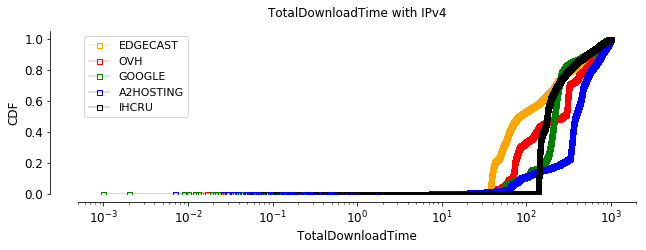

In [42]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asno.png', format='png', bbox_inches='tight')

## Google Analysis

In [46]:
quic15169['Protocol'].unique()

array(['Q044', 'Q043', 'Q039', 'Q035'], dtype=object)

In [47]:
quic44 = quic15169.loc[t['Protocol'] == 'Q044']
quic43 = quic15169.loc[t['Protocol'] == 'Q043']
quic39 = quic15169.loc[t['Protocol'] == 'Q039']
quic35 = quic15169.loc[t['Protocol'] == 'Q035']

In [48]:
quic44.to_csv('quicASNdata/15169-44.csv')
quic43.to_csv('quicASNdata/15169-43.csv')
quic39.to_csv('quicASNdata/15169-39.csv')
quic35.to_csv('quicASNdata/15169-35.csv')

In [49]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [50]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:36.433000

90th Percentile:38.126000

99th Percentile:55.472000

25th Percentile:35.804000

75th Percentile:37.079000

20th Percentile:36.433000

40th Percentile:38.126000

60th Percentile:55.472000

80th Percentile:35.804000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:36.456000

90th Percentile:38.154000

99th Percentile:55.344000

25th Percentile:35.827000

75th Percentile:37.105000

20th Percentile:36.456000

40th Percentile:38.154000

60th Percentile:55.344000

80th Percentile:35.827000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:36.429000

90th Percentile:38.121000

99th Percentile:55.412000

25th Percentile:35.801000

75th Percentile:37.074000

20th Percentile:36.429000

40th Percentile:38.121000

60th Percentile:55.412000

80th Percentile:35.8

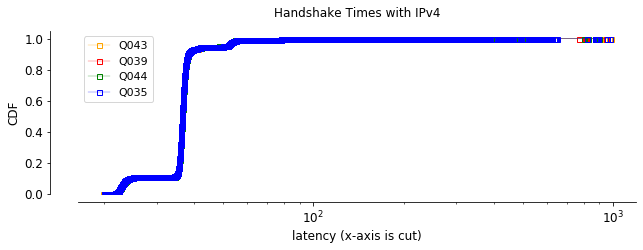

In [51]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [54]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [55]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:207.798000

90th Percentile:431.733000

99th Percentile:861.716000

25th Percentile:172.450000

75th Percentile:242.288000

20th Percentile:207.798000

40th Percentile:431.733000

60th Percentile:861.716000

80th Percentile:172.450000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:212.295000

90th Percentile:462.605000

99th Percentile:873.097000

25th Percentile:176.704000

75th Percentile:247.987000

20th Percentile:212.295000

40th Percentile:462.605000

60th Percentile:873.097000

80th Percentile:176.704000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:207.722000

90th Percentile:429.344000

99th Percentile:861.673000

25th Percentile:172.295000

75th Percentile:242.218000

20th Percentile:207.722000

40th Percentile:429.344000

60th Percentile:861.67

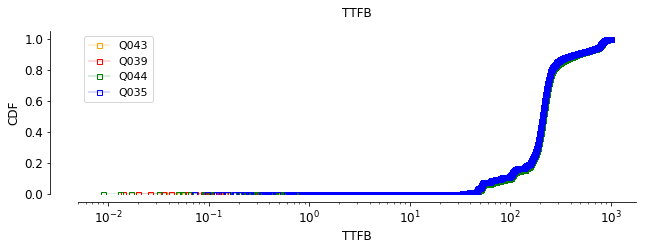

In [47]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [56]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [57]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:212.874000

90th Percentile:518.896000

99th Percentile:877.883000

25th Percentile:178.506000

75th Percentile:249.593000

20th Percentile:212.874000

40th Percentile:518.896000

60th Percentile:877.883000

80th Percentile:178.506000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:217.506000

90th Percentile:532.463000

99th Percentile:889.525000

25th Percentile:182.814000

75th Percentile:255.949000

20th Percentile:217.506000

40th Percentile:532.463000

60th Percentile:889.525000

80th Percentile:182.814000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:212.803000

90th Percentile:516.994000

99th Percentile:877.113000

25th Percentile:178.348000

75th Percentile:249.499000

20th Percentile:212.803000

40th Percentile:516.994000

60th Percentile:877.11

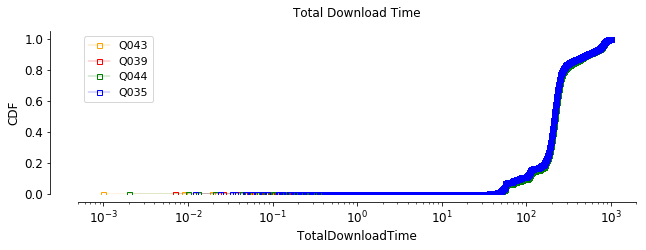

In [49]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time', fontsize=12, y=1.05)
plt.savefig('./plots/VM/total_download_time_ipv4_asn15169.png', format='png', bbox_inches='tight')


## Edgecast analysis

In [52]:
quic44 = quic15133.loc[t['Protocol'] == 'Q044']
quic43 = quic15133.loc[t['Protocol'] == 'Q043']
quic39 = quic15133.loc[t['Protocol'] == 'Q039']
quic35 = quic15133.loc[t['Protocol'] == 'Q035']

In [53]:
quic44.to_csv('quicASNdata/15133-44.csv')
quic43.to_csv('quicASNdata/15133-43.csv')
quic39.to_csv('quicASNdata/15133-39.csv')
quic35.to_csv('quicASNdata/15133-35.csv')

In [59]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [60]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:23.959000

90th Percentile:26.999000

99th Percentile:46.918000

25th Percentile:23.097000

75th Percentile:25.331000

20th Percentile:23.959000

40th Percentile:26.999000

60th Percentile:46.918000

80th Percentile:23.097000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:24.330000

90th Percentile:27.420000

99th Percentile:47.432000

25th Percentile:23.352000

75th Percentile:25.710000

20th Percentile:24.330000

40th Percentile:27.420000

60th Percentile:47.432000

80th Percentile:23.352000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:23.846000

90th Percentile:26.887000

99th Percentile:46.561000

25th Percentile:23.032000

75th Percentile:25.205000

20th Percentile:23.846000

40th Percentile:26.887000

60th Percentile:46.561000

80th Percentile:23.0

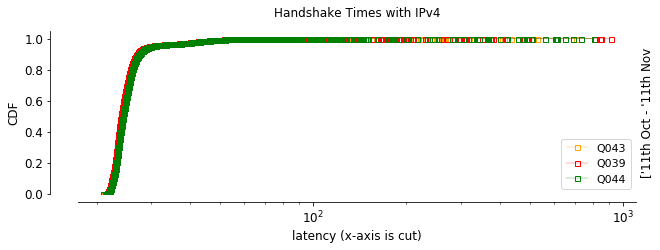

In [52]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [61]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [62]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:57.010000

90th Percentile:475.299000

99th Percentile:907.931000

25th Percentile:34.629000

75th Percentile:211.735000

20th Percentile:57.010000

40th Percentile:475.299000

60th Percentile:907.931000

80th Percentile:34.629000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:99.440000

90th Percentile:581.105000

99th Percentile:937.561000

25th Percentile:36.347000

75th Percentile:266.763000

20th Percentile:99.440000

40th Percentile:581.105000

60th Percentile:937.561000

80th Percentile:36.347000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:53.796000

90th Percentile:469.714000

99th Percentile:906.242000

25th Percentile:34.455000

75th Percentile:208.589000

20th Percentile:53.796000

40th Percentile:469.714000

60th Percentile:906.242000

80th 

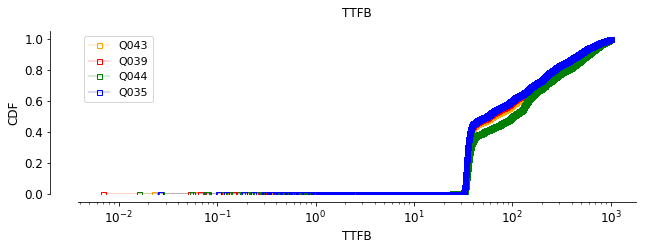

In [54]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [63]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [64]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:74.421000

90th Percentile:545.368000

99th Percentile:942.808000

25th Percentile:48.250000

75th Percentile:235.999000

20th Percentile:74.421000

40th Percentile:545.368000

60th Percentile:942.808000

80th Percentile:48.250000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:121.157000

90th Percentile:644.384000

99th Percentile:956.170000

25th Percentile:50.837000

75th Percentile:324.072000

20th Percentile:121.157000

40th Percentile:644.384000

60th Percentile:956.170000

80th Percentile:50.837000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:72.126000

90th Percentile:535.939000

99th Percentile:940.137000

25th Percentile:48.065000

75th Percentile:230.363000

20th Percentile:72.126000

40th Percentile:535.939000

60th Percentile:940.137000

80t

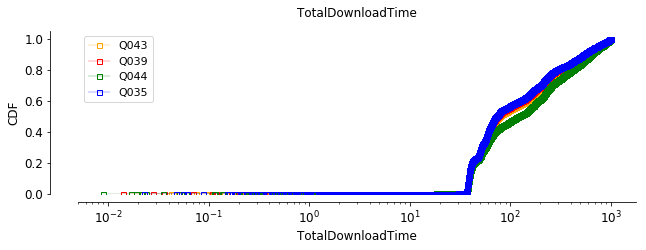

In [56]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/Total_Download_time_ipv4_asn15133.png', format='png', bbox_inches='tight')


## IHCRU Dataset

In [54]:
quic44 = quic203226.loc[t['Protocol'] == 'Q044']
quic43 = quic203226.loc[t['Protocol'] == 'Q043']
quic39 = quic203226.loc[t['Protocol'] == 'Q039']
quic35 = quic203226.loc[t['Protocol'] == 'Q035']

In [55]:
quic44.to_csv('quicASNdata/203226-44.csv')
quic43.to_csv('quicASNdata/203226-43.csv')
quic39.to_csv('quicASNdata/203226-39.csv')
quic35.to_csv('quicASNdata/203226-35.csv')

In [56]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [57]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:94.736000

90th Percentile:118.398000

99th Percentile:194.072000

25th Percentile:92.146000

75th Percentile:113.177000

20th Percentile:94.736000

40th Percentile:118.398000

60th Percentile:194.072000

80th Percentile:92.146000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:93.569000

90th Percentile:109.682000

99th Percentile:242.685000

25th Percentile:91.478000

75th Percentile:95.714000

20th Percentile:93.569000

40th Percentile:109.682000

60th Percentile:242.685000

80th Percentile:91.478000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:94.706000

90th Percentile:118.318000

99th Percentile:193.914000

25th Percentile:92.145000

75th Percentile:113.117000

20th Percentile:94.706000

40th Percentile:118.318000

60th Percentile:193.914000

80th P

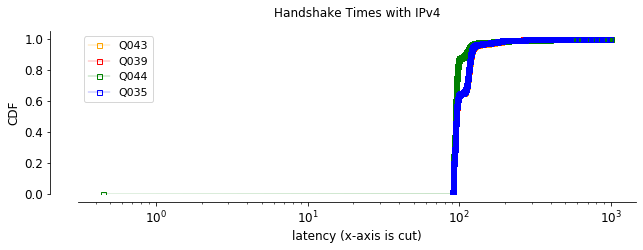

In [58]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [93]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [94]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:169.178000

90th Percentile:473.039000

99th Percentile:916.523000

25th Percentile:139.098000

75th Percentile:236.752000

20th Percentile:169.178000

40th Percentile:473.039000

60th Percentile:916.523000

80th Percentile:139.098000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:148.428000

90th Percentile:507.735000

99th Percentile:931.063000

25th Percentile:137.971000

75th Percentile:251.929000

20th Percentile:148.428000

40th Percentile:507.735000

60th Percentile:931.063000

80th Percentile:137.971000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:169.220000

90th Percentile:470.792000

99th Percentile:911.137000

25th Percentile:139.074000

75th Percentile:236.319000

20th Percentile:169.220000

40th Percentile:470.792000

60th Percentile:911.13

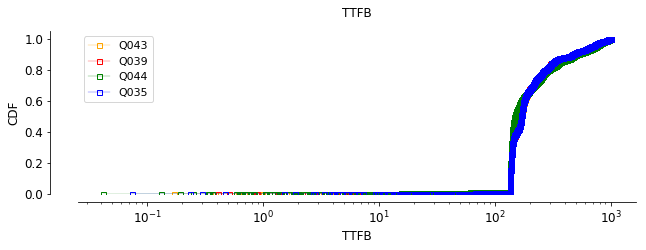

In [61]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/ttfb_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [95]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [96]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:175.521000

90th Percentile:504.790000

99th Percentile:919.531000

25th Percentile:143.440000

75th Percentile:259.793000

20th Percentile:175.521000

40th Percentile:504.790000

60th Percentile:919.531000

80th Percentile:143.440000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:156.268000

90th Percentile:561.107000

99th Percentile:932.321000

25th Percentile:142.255000

75th Percentile:270.359000

20th Percentile:156.268000

40th Percentile:561.107000

60th Percentile:932.321000

80th Percentile:142.255000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:175.747000

90th Percentile:504.862000

99th Percentile:914.074000

25th Percentile:143.426000

75th Percentile:258.915000

20th Percentile:175.747000

40th Percentile:504.862000

60th Percentile:914.07

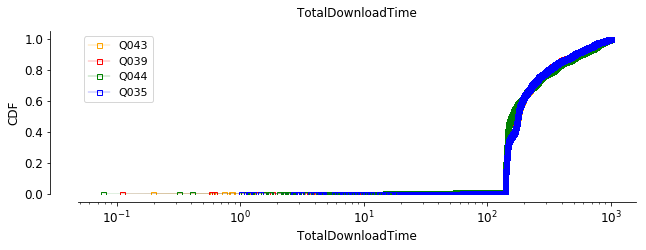

In [63]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/totaldownloadtime_ipv4_asn203226.png', format='png', bbox_inches='tight')


&nbsp;

## A2Hosting Analysis

In [90]:
quic44 = quic55293.loc[t['Protocol'] == 'Q044']
quic43 = quic55293.loc[t['Protocol'] == 'Q043']
quic39 = quic55293.loc[t['Protocol'] == 'Q039']
quic35 = quic55293.loc[t['Protocol'] == 'Q035']

In [91]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [92]:
quic44.to_csv('quicASNdata/55293-44.csv')
quic43.to_csv('quicASNdata/55293-43.csv')
quic39.to_csv('quicASNdata/55293-39.csv')
quic35.to_csv('quicASNdata/55293-35.csv')

In [ ]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

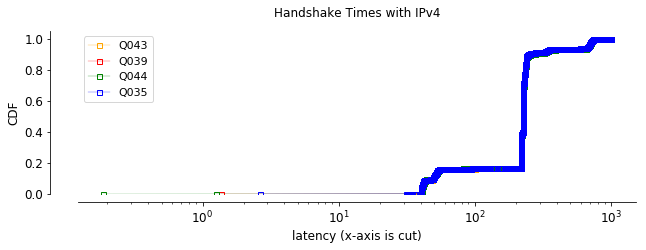

In [66]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4_asn55293.png', format='png', bbox_inches='tight')


In [99]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [100]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:351.580000

90th Percentile:743.173000

99th Percentile:980.678000

25th Percentile:326.187000

75th Percentile:478.494000

20th Percentile:351.580000

40th Percentile:743.173000

60th Percentile:980.678000

80th Percentile:326.187000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:358.630000

90th Percentile:772.700000

99th Percentile:981.179000

25th Percentile:325.613000

75th Percentile:535.684000

20th Percentile:358.630000

40th Percentile:772.700000

60th Percentile:981.179000

80th Percentile:325.613000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:351.621000

90th Percentile:741.315000

99th Percentile:979.994000

25th Percentile:326.088000

75th Percentile:478.163000

20th Percentile:351.621000

40th Percentile:741.315000

60th Percentile:979.99

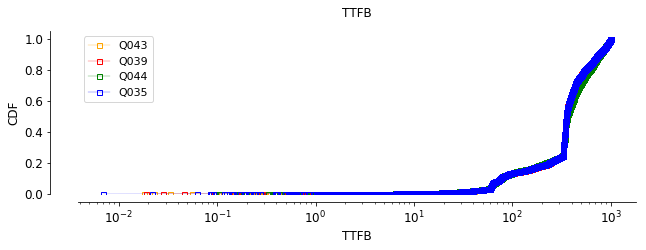

In [68]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asn55293.png', format='png', bbox_inches='tight')


In [101]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [102]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:372.605000

90th Percentile:767.686000

99th Percentile:980.578000

25th Percentile:331.341000

75th Percentile:510.205000

20th Percentile:372.605000

40th Percentile:767.686000

60th Percentile:980.578000

80th Percentile:331.341000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:402.478000

90th Percentile:796.453000

99th Percentile:978.971000

25th Percentile:331.530000

75th Percentile:559.581000

20th Percentile:402.478000

40th Percentile:796.453000

60th Percentile:978.971000

80th Percentile:331.530000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:373.138000

90th Percentile:764.792000

99th Percentile:978.260000

25th Percentile:331.244000

75th Percentile:509.513000

20th Percentile:373.138000

40th Percentile:764.792000

60th Percentile:978.26

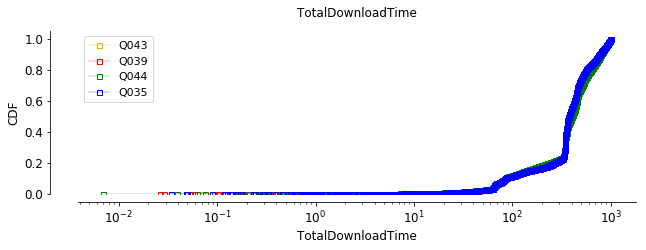

In [70]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asn55293.png', format='png', bbox_inches='tight')


In [103]:
quic44 = quic16276.loc[t['Protocol'] == 'Q044']
quic43 = quic16276.loc[t['Protocol'] == 'Q043']
quic39 = quic16276.loc[t['Protocol'] == 'Q039']
quic35 = quic16276.loc[t['Protocol'] == 'Q035']

In [104]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [105]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:52.040000

90th Percentile:206.639000

99th Percentile:330.029000

25th Percentile:44.922000

75th Percentile:201.549000

20th Percentile:52.040000

40th Percentile:206.639000

60th Percentile:330.029000

80th Percentile:44.922000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:52.435000

90th Percentile:206.165000

99th Percentile:336.366000

25th Percentile:45.224000

75th Percentile:201.723000

20th Percentile:52.435000

40th Percentile:206.165000

60th Percentile:336.366000

80th Percentile:45.224000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:52.170000

90th Percentile:206.588000

99th Percentile:330.979000

25th Percentile:44.931000

75th Percentile:201.537000

20th Percentile:52.170000

40th Percentile:206.588000

60th Percentile:330.979000

80th 

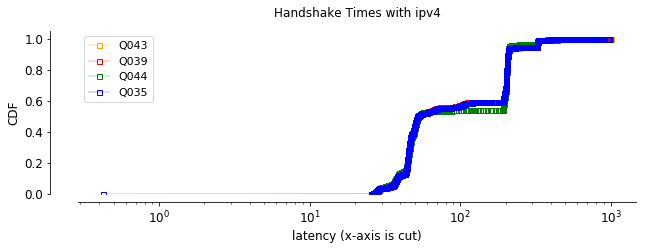

In [73]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv4_asn16276.png', format='png', bbox_inches='tight')


In [106]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [107]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:264.826000

90th Percentile:589.700000

99th Percentile:915.636000

25th Percentile:70.499000

75th Percentile:320.646000

20th Percentile:264.826000

40th Percentile:589.700000

60th Percentile:915.636000

80th Percentile:70.499000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:290.216000

90th Percentile:662.125000

99th Percentile:942.651000

25th Percentile:71.263000

75th Percentile:375.171000

20th Percentile:290.216000

40th Percentile:662.125000

60th Percentile:942.651000

80th Percentile:71.263000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:271.525000

90th Percentile:595.782000

99th Percentile:929.289000

25th Percentile:70.265000

75th Percentile:323.660000

20th Percentile:271.525000

40th Percentile:595.782000

60th Percentile:929.289000


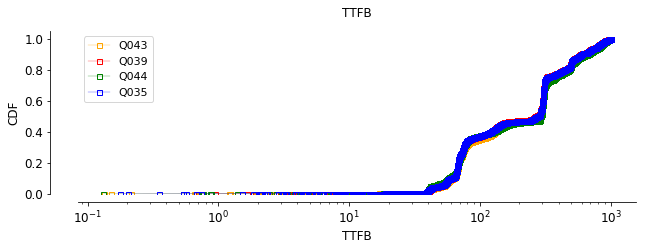

In [75]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asn16276.png', format='png', bbox_inches='tight')


In [108]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [109]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:259.002000

90th Percentile:677.710000

99th Percentile:963.897000

25th Percentile:76.240000

75th Percentile:398.811000

20th Percentile:259.002000

40th Percentile:677.710000

60th Percentile:963.897000

80th Percentile:76.240000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:292.522000

90th Percentile:724.874000

99th Percentile:972.952000

25th Percentile:76.843000

75th Percentile:413.371000

20th Percentile:292.522000

40th Percentile:724.874000

60th Percentile:972.952000

80th Percentile:76.843000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:264.020000

90th Percentile:682.506000

99th Percentile:970.818000

25th Percentile:76.208000

75th Percentile:402.035000

20th Percentile:264.020000

40th Percentile:682.506000

60th Percentile:970.818000


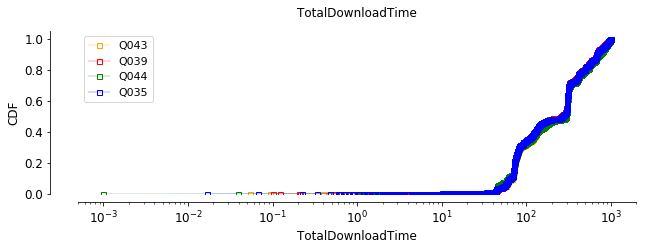

In [77]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_asn16276.png', format='png', bbox_inches='tight')

In [45]:
x = Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [46]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:201.959000

90th Percentile:205.483000

99th Percentile:209.835000

25th Percentile:199.759000

75th Percentile:203.597000

20th Percentile:201.959000

40th Percentile:205.483000

60th Percentile:209.835000

80th Percentile:199.759000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.556000

90th Percentile:38.284000

99th Percentile:54.947000

25th Percentile:36.042000

75th Percentile:37.173000

20th Percentile:36.556000

40th Percentile:38.284000

60th Percentile:54.947000

80th Percentile:36.042000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:98.330000

90th Percentile:113.458000

99th Percentile:147.001000

25th Percentile:91.542000

75th Percentile:108.160000

20th Percentile:98.330000

40th Percentile:113.458000

60th Percentile:14

IndexError: list index out of range

In [195]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

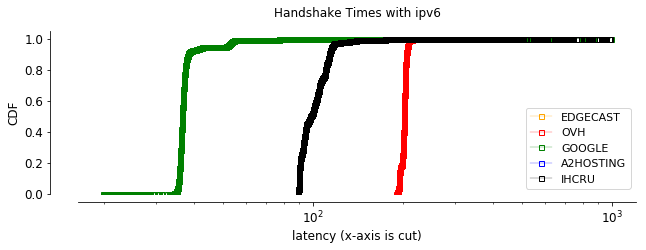

In [79]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asno.png', format='png', bbox_inches='tight')


In [47]:
x = Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [48]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:417.010000

90th Percentile:483.465000

99th Percentile:516.216000

25th Percentile:378.630000

75th Percentile:464.869000

20th Percentile:417.010000

40th Percentile:483.465000

60th Percentile:516.216000

80th Percentile:378.630000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:206.760000

90th Percentile:290.941000

99th Percentile:843.723000

25th Percentile:175.839000

75th Percentile:235.104000

20th Percentile:206.760000

40th Percentile:290.941000

60th Percentile:843.723000

80th Percentile:175.839000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:161.769000

90th Percentile:468.139000

99th Percentile:911.273000

25th Percentile:139.344000

75th Percentile:214.969000

20th Percentile:161.769000

40th Percentile:468.139000

60th P

IndexError: list index out of range

In [197]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

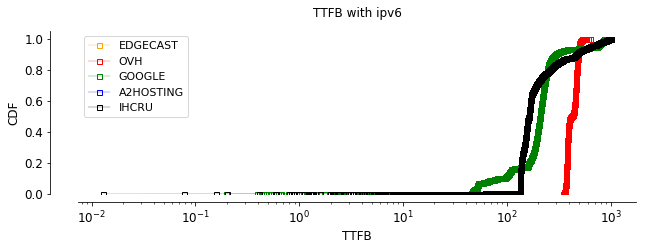

In [81]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asno.png', format='png', bbox_inches='tight')

In [49]:
x = Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [50]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:421.227000

90th Percentile:488.010000

99th Percentile:520.627000

25th Percentile:382.784000

75th Percentile:469.043000

20th Percentile:421.227000

40th Percentile:488.010000

60th Percentile:520.627000

80th Percentile:382.784000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:211.172000

90th Percentile:321.685000

99th Percentile:848.916000

25th Percentile:180.423000

75th Percentile:240.565000

20th Percentile:211.172000

40th Percentile:321.685000

60th Percentile:848.916000

80th Percentile:180.423000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:168.734000

90th Percentile:492.897000

99th Percentile:914.321000

25th Percentile:145.467000

75th Percentile:228.880000

20th Percentile:168.734000

40th Percentile:492.897000

60th P

IndexError: list index out of range

In [199]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

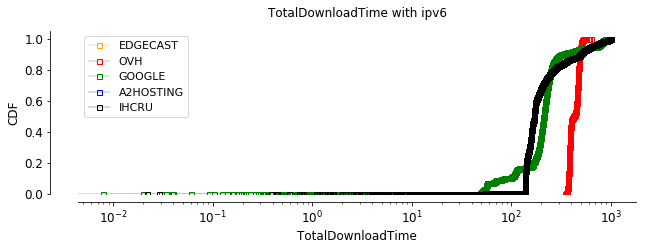

In [83]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asno.png', format='png', bbox_inches='tight')

In [65]:
quic44 = quic16276_6.loc[t['Protocol'] == 'Q044']
quic43 = quic16276_6.loc[t['Protocol'] == 'Q043']
quic39 = quic16276_6.loc[t['Protocol'] == 'Q039']
quic35 = quic16276_6.loc[t['Protocol'] == 'Q035']

In [73]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [74]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:201.899000

90th Percentile:206.001000

99th Percentile:209.376000

25th Percentile:199.769000

75th Percentile:203.878000

20th Percentile:201.899000

40th Percentile:206.001000

60th Percentile:209.376000

80th Percentile:199.769000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:202.131000

90th Percentile:204.847000

99th Percentile:217.846000

25th Percentile:195.344000

75th Percentile:203.248000

20th Percentile:202.131000

40th Percentile:204.847000

60th Percentile:217.846000

80th Percentile:195.344000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:202.040000

90th Percentile:205.520000

99th Percentile:209.162000

25th Percentile:199.799000

75th Percentile:203.656000

20th Percentile:202.040000

40th Percentile:205.520000

60th Percentile:209.16

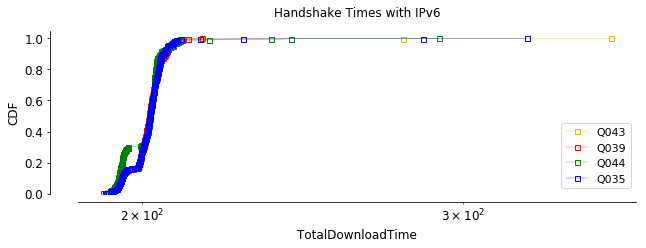

In [75]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn16276.png', format='png', bbox_inches='tight')


In [76]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [77]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:390.724000

90th Percentile:481.971000

99th Percentile:503.060000

25th Percentile:377.538000

75th Percentile:463.343000

20th Percentile:390.724000

40th Percentile:481.971000

60th Percentile:503.060000

80th Percentile:377.538000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:397.561000

90th Percentile:474.698000

99th Percentile:532.313000

25th Percentile:376.248000

75th Percentile:462.108000

20th Percentile:397.561000

40th Percentile:474.698000

60th Percentile:532.313000

80th Percentile:376.248000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:434.504000

90th Percentile:477.167000

99th Percentile:501.387000

25th Percentile:378.932000

75th Percentile:462.303000

20th Percentile:434.504000

40th Percentile:477.167000

60th Percentile:501.38

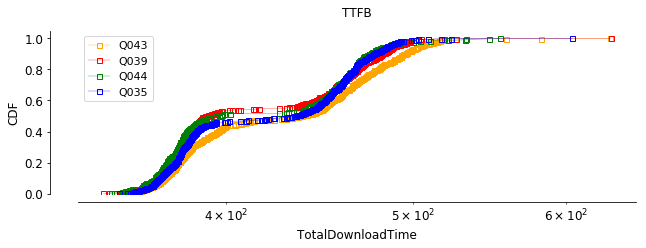

In [88]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn16276.png', format='png', bbox_inches='tight')

In [78]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [79]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:394.900000

90th Percentile:486.138000

99th Percentile:507.183000

25th Percentile:381.774000

75th Percentile:467.597000

20th Percentile:394.900000

40th Percentile:486.138000

60th Percentile:507.183000

80th Percentile:381.774000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:401.781000

90th Percentile:478.951000

99th Percentile:536.503000

25th Percentile:380.426000

75th Percentile:466.261000

20th Percentile:401.781000

40th Percentile:478.951000

60th Percentile:536.503000

80th Percentile:380.426000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:438.725000

90th Percentile:481.374000

99th Percentile:505.529000

25th Percentile:383.123000

75th Percentile:466.468000

20th Percentile:438.725000

40th Percentile:481.374000

60th Percentile:505.52

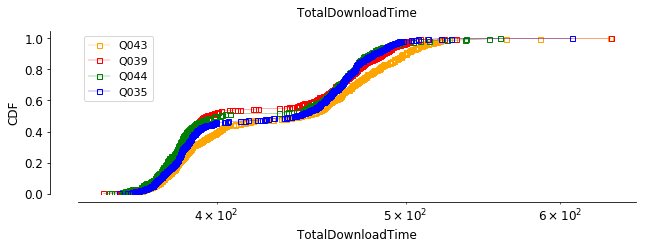

In [90]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asn16276.png', format='png', bbox_inches='tight')

In [80]:
quic44 = quic15169_6.loc[t['Protocol'] == 'Q044']
quic43 = quic15169_6.loc[t['Protocol'] == 'Q043']
quic39 = quic15169_6.loc[t['Protocol'] == 'Q039']
quic35 = quic15169_6.loc[t['Protocol'] == 'Q035']

In [81]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [82]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:36.552000

90th Percentile:38.277000

99th Percentile:54.929000

25th Percentile:36.038000

75th Percentile:37.168000

20th Percentile:36.552000

40th Percentile:38.277000

60th Percentile:54.929000

80th Percentile:36.038000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:36.570000

90th Percentile:38.302000

99th Percentile:54.981000

25th Percentile:36.055000

75th Percentile:37.188000

20th Percentile:36.570000

40th Percentile:38.302000

60th Percentile:54.981000

80th Percentile:36.055000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:36.550000

90th Percentile:38.275000

99th Percentile:54.928000

25th Percentile:36.036000

75th Percentile:37.165000

20th Percentile:36.550000

40th Percentile:38.275000

60th Percentile:54.928000

80th Percentile:36.0

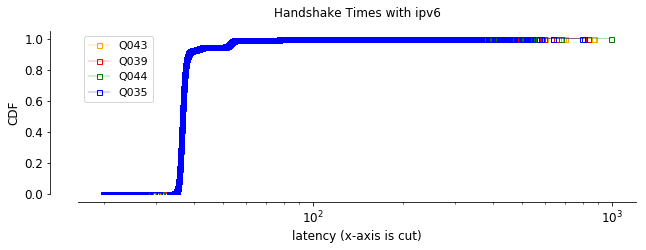

In [93]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn15169.png', format='png', bbox_inches='tight')


In [83]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [84]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:206.537000

90th Percentile:289.592000

99th Percentile:842.856000

25th Percentile:175.654000

75th Percentile:234.807000

20th Percentile:206.537000

40th Percentile:289.592000

60th Percentile:842.856000

80th Percentile:175.654000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:207.401000

90th Percentile:295.313000

99th Percentile:845.963000

25th Percentile:176.368000

75th Percentile:236.048000

20th Percentile:207.401000

40th Percentile:295.313000

60th Percentile:845.963000

80th Percentile:176.368000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:206.537000

90th Percentile:289.136000

99th Percentile:842.911000

25th Percentile:175.655000

75th Percentile:234.748000

20th Percentile:206.537000

40th Percentile:289.136000

60th Percentile:842.91

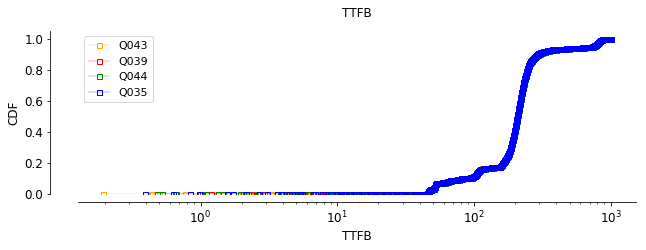

In [95]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn15169.png', format='png', bbox_inches='tight')


In [85]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [86]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:210.944000

90th Percentile:319.439000

99th Percentile:848.026000

25th Percentile:180.233000

75th Percentile:240.253000

20th Percentile:210.944000

40th Percentile:319.439000

60th Percentile:848.026000

80th Percentile:180.233000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:211.816000

90th Percentile:329.416000

99th Percentile:851.171000

25th Percentile:180.967000

75th Percentile:241.511000

20th Percentile:211.816000

40th Percentile:329.416000

60th Percentile:851.171000

80th Percentile:180.967000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:210.944000

90th Percentile:318.525000

99th Percentile:848.040000

25th Percentile:180.216000

75th Percentile:240.205000

20th Percentile:210.944000

40th Percentile:318.525000

60th Percentile:848.04

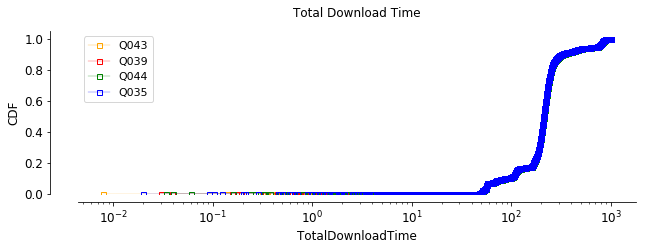

In [97]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time', fontsize=12, y=1.05)
plt.savefig('./plots/VM/total_download_time_ipv6_asn15169.png', format='png', bbox_inches='tight')


In [87]:
quic44 = quic15133_6.loc[t['Protocol'] == 'Q044']
quic43 = quic15133_6.loc[t['Protocol'] == 'Q043']
quic39 = quic15133_6.loc[t['Protocol'] == 'Q039']
quic35 = quic15133_6.loc[t['Protocol'] == 'Q035']

In [88]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [89]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039



IndexError: list index out of range

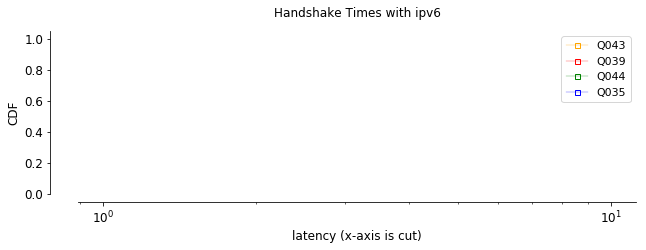

In [100]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn15133.png', format='png', bbox_inches='tight')


In [101]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

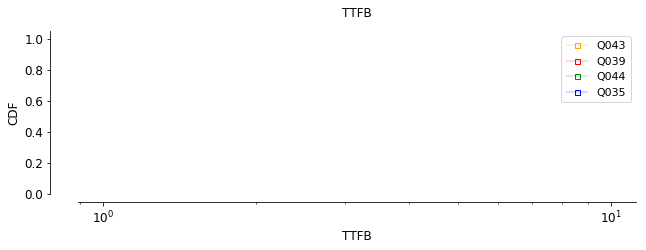

In [102]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn15133.png', format='png', bbox_inches='tight')


In [103]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

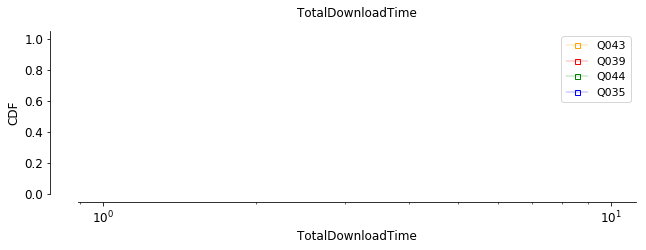

In [104]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/Total_Download_time_ipv6_asn15133.png', format='png', bbox_inches='tight')


In [110]:
quic44 = quic203226_6.loc[t['Protocol'] == 'Q044']
quic43 = quic203226_6.loc[t['Protocol'] == 'Q043']
quic39 = quic203226_6.loc[t['Protocol'] == 'Q039']
quic35 = quic203226_6.loc[t['Protocol'] == 'Q035']

In [111]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [112]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:96.451000

90th Percentile:113.255000

99th Percentile:139.904000

25th Percentile:90.943000

75th Percentile:107.047000

20th Percentile:96.451000

40th Percentile:113.255000

60th Percentile:139.904000

80th Percentile:90.943000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:102.738000

90th Percentile:114.389000

99th Percentile:162.140000

25th Percentile:94.014000

75th Percentile:110.419000

20th Percentile:102.738000

40th Percentile:114.389000

60th Percentile:162.140000

80th Percentile:94.014000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:96.546000

90th Percentile:113.279000

99th Percentile:140.290000

25th Percentile:90.975000

75th Percentile:107.089000

20th Percentile:96.546000

40th Percentile:113.279000

60th Percentile:140.290000

80t

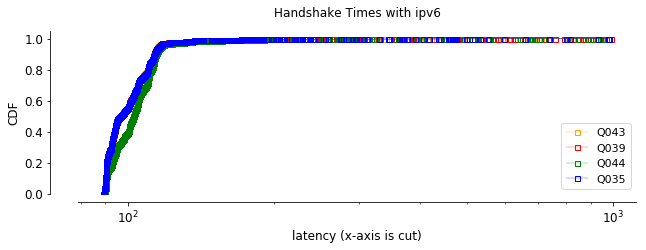

In [107]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn203226.png', format='png', bbox_inches='tight')


In [113]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [114]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:159.920000

90th Percentile:468.598000

99th Percentile:914.434000

25th Percentile:138.360000

75th Percentile:213.100000

20th Percentile:159.920000

40th Percentile:468.598000

60th Percentile:914.434000

80th Percentile:138.360000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:164.781000

90th Percentile:466.808000

99th Percentile:908.072000

25th Percentile:148.041000

75th Percentile:221.200000

20th Percentile:164.781000

40th Percentile:466.808000

60th Percentile:908.072000

80th Percentile:148.041000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:160.015000

90th Percentile:468.083000

99th Percentile:907.376000

25th Percentile:138.361000

75th Percentile:212.421000

20th Percentile:160.015000

40th Percentile:468.083000

60th Percentile:907.37

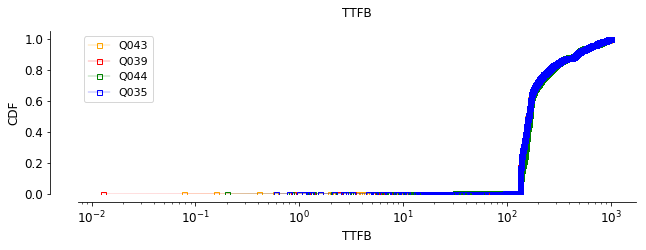

In [109]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/ttfb_ipv6_asn203226.png', format='png', bbox_inches='tight')


In [115]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [116]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:168.403000

90th Percentile:493.387000

99th Percentile:918.081000

25th Percentile:142.982000

75th Percentile:227.929000

20th Percentile:168.403000

40th Percentile:493.387000

60th Percentile:918.081000

80th Percentile:142.982000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:170.141000

90th Percentile:491.736000

99th Percentile:910.193000

25th Percentile:153.856000

75th Percentile:233.968000

20th Percentile:170.141000

40th Percentile:491.736000

60th Percentile:910.193000

80th Percentile:153.856000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:168.431000

90th Percentile:493.142000

99th Percentile:910.634000

25th Percentile:142.911000

75th Percentile:226.830000

20th Percentile:168.431000

40th Percentile:493.142000

60th Percentile:910.63

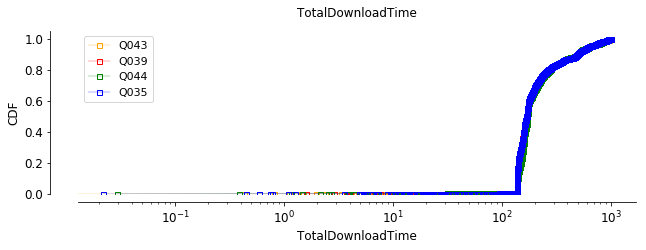

In [111]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/totaldownloadtime_ipv6_asn203226.png', format='png', bbox_inches='tight')


In [117]:
quic44 = quic55293_6.loc[t['Protocol'] == 'Q044']
quic43 = quic55293_6.loc[t['Protocol'] == 'Q043']
quic39 = quic55293_6.loc[t['Protocol'] == 'Q039']
quic35 = quic55293_6.loc[t['Protocol'] == 'Q035']

In [118]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [119]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039



IndexError: list index out of range

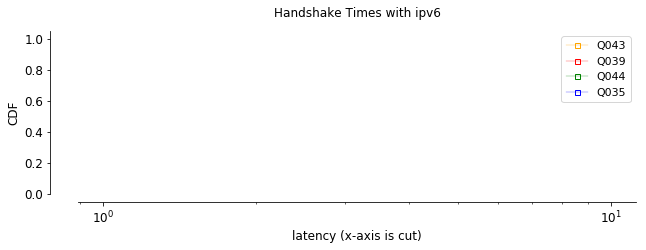

In [114]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn55293.png', format='png', bbox_inches='tight')


In [120]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [121]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039



IndexError: list index out of range

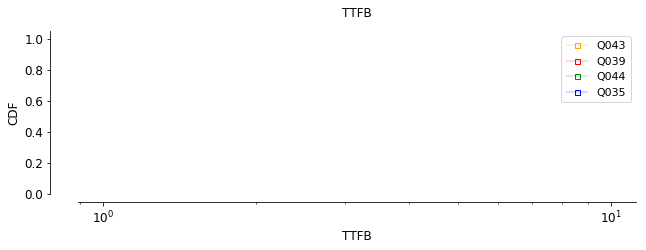

In [116]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn55293.png', format='png', bbox_inches='tight')


In [117]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

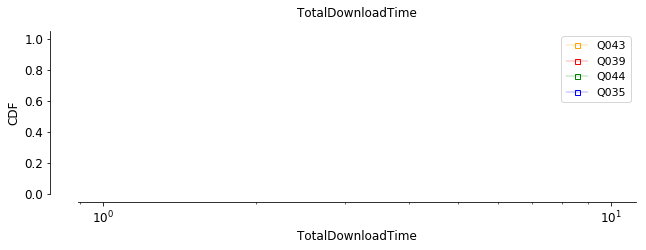

In [118]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn55293.png', format='png', bbox_inches='tight')


In [122]:
quic44 = quic16276_6.loc[t['Protocol'] == 'Q044']
quic43 = quic16276_6.loc[t['Protocol'] == 'Q043']
quic39 = quic16276_6.loc[t['Protocol'] == 'Q039']
quic35 = quic16276_6.loc[t['Protocol'] == 'Q035']

In [123]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)

In [124]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:201.899000

90th Percentile:206.001000

99th Percentile:209.376000

25th Percentile:199.769000

75th Percentile:203.878000

20th Percentile:201.899000

40th Percentile:206.001000

60th Percentile:209.376000

80th Percentile:199.769000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:202.131000

90th Percentile:204.847000

99th Percentile:217.846000

25th Percentile:195.344000

75th Percentile:203.248000

20th Percentile:202.131000

40th Percentile:204.847000

60th Percentile:217.846000

80th Percentile:195.344000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:202.040000

90th Percentile:205.520000

99th Percentile:209.162000

25th Percentile:199.799000

75th Percentile:203.656000

20th Percentile:202.040000

40th Percentile:205.520000

60th Percentile:209.16

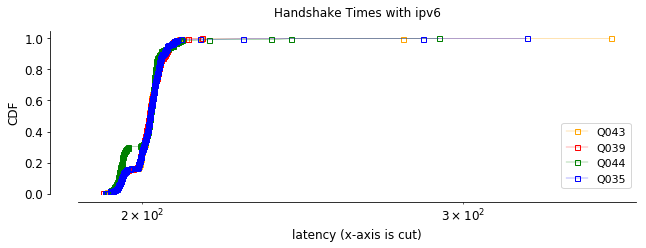

In [121]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asn16276.png', format='png', bbox_inches='tight')


In [125]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)

In [126]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:390.724000

90th Percentile:481.971000

99th Percentile:503.060000

25th Percentile:377.538000

75th Percentile:463.343000

20th Percentile:390.724000

40th Percentile:481.971000

60th Percentile:503.060000

80th Percentile:377.538000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:397.561000

90th Percentile:474.698000

99th Percentile:532.313000

25th Percentile:376.248000

75th Percentile:462.108000

20th Percentile:397.561000

40th Percentile:474.698000

60th Percentile:532.313000

80th Percentile:376.248000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:434.504000

90th Percentile:477.167000

99th Percentile:501.387000

25th Percentile:378.932000

75th Percentile:462.303000

20th Percentile:434.504000

40th Percentile:477.167000

60th Percentile:501.38

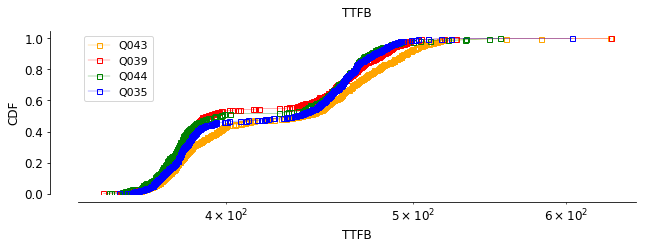

In [123]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asn16276.png', format='png', bbox_inches='tight')


In [127]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)

In [128]:
print_percentiles(x1, 'Q039')
print_percentiles(x3, 'Q044')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:394.900000

90th Percentile:486.138000

99th Percentile:507.183000

25th Percentile:381.774000

75th Percentile:467.597000

20th Percentile:394.900000

40th Percentile:486.138000

60th Percentile:507.183000

80th Percentile:381.774000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:401.781000

90th Percentile:478.951000

99th Percentile:536.503000

25th Percentile:380.426000

75th Percentile:466.261000

20th Percentile:401.781000

40th Percentile:478.951000

60th Percentile:536.503000

80th Percentile:380.426000

-----------------------------

-----------------------------

percentile values distribution for Q035

50th Percentile:438.725000

90th Percentile:481.374000

99th Percentile:505.529000

25th Percentile:383.123000

75th Percentile:466.468000

20th Percentile:438.725000

40th Percentile:481.374000

60th Percentile:505.52

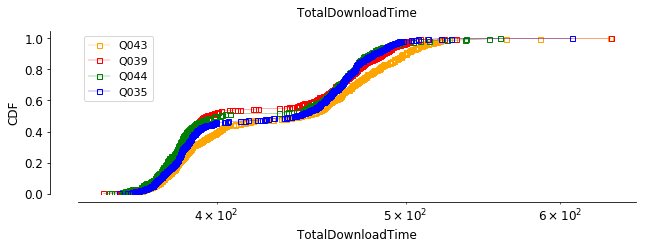

In [125]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asn16276.png', format='png', bbox_inches='tight')


In [129]:
quic44 = quic4.loc[t['Protocol'] == 'Q044']
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic39 = quic4.loc[t['Protocol'] == 'Q039']
quic35 = quic4.loc[t['Protocol'] == 'Q035']

In [130]:
quic15169 = quic44.loc[t['ASNo'] == 15169]
quic15133 = quic44.loc[t['ASNo'] == 15133]
quic203226= quic44.loc[t['ASNo'] == 203226]
quic55293 = quic44.loc[t['ASNo'] == 55293]
quic16276 = quic44.loc[t['ASNo'] == 16276]

In [131]:
x = Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [132]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:52.435000

90th Percentile:206.165000

99th Percentile:336.366000

25th Percentile:45.224000

75th Percentile:201.723000

20th Percentile:52.435000

40th Percentile:206.165000

60th Percentile:336.366000

80th Percentile:45.224000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.456000

90th Percentile:38.154000

99th Percentile:55.344000

25th Percentile:35.827000

75th Percentile:37.105000

20th Percentile:36.456000

40th Percentile:38.154000

60th Percentile:55.344000

80th Percentile:35.827000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:93.569000

90th Percentile:109.682000

99th Percentile:242.685000

25th Percentile:91.478000

75th Percentile:95.714000

20th Percentile:93.569000

40th Percentile:109.682000

60th Percentile:242.685

In [203]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

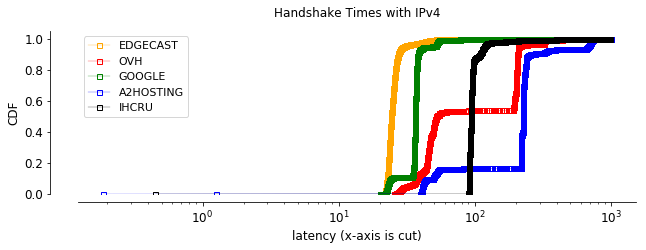

In [129]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_IPv4_asno_Q044.png', format='png', bbox_inches='tight')

In [133]:
x = Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [205]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

In [134]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:290.216000

90th Percentile:662.125000

99th Percentile:942.651000

25th Percentile:71.263000

75th Percentile:375.171000

20th Percentile:290.216000

40th Percentile:662.125000

60th Percentile:942.651000

80th Percentile:71.263000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:212.295000

90th Percentile:462.605000

99th Percentile:873.097000

25th Percentile:176.704000

75th Percentile:247.987000

20th Percentile:212.295000

40th Percentile:462.605000

60th Percentile:873.097000

80th Percentile:176.704000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:148.428000

90th Percentile:507.735000

99th Percentile:931.063000

25th Percentile:137.971000

75th Percentile:251.929000

20th Percentile:148.428000

40th Percentile:507.735000

60th Per

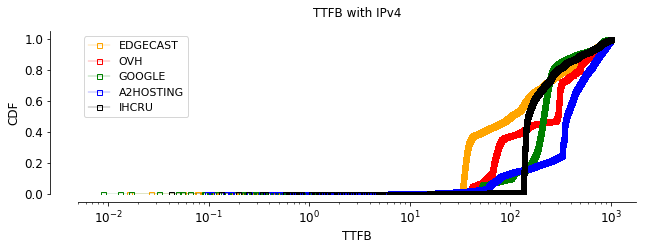

In [131]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asno_Q044.png', format='png', bbox_inches='tight')

In [135]:
x = Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [136]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:292.522000

90th Percentile:724.874000

99th Percentile:972.952000

25th Percentile:76.843000

75th Percentile:413.371000

20th Percentile:292.522000

40th Percentile:724.874000

60th Percentile:972.952000

80th Percentile:76.843000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:217.506000

90th Percentile:532.463000

99th Percentile:889.525000

25th Percentile:182.814000

75th Percentile:255.949000

20th Percentile:217.506000

40th Percentile:532.463000

60th Percentile:889.525000

80th Percentile:182.814000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:156.268000

90th Percentile:561.107000

99th Percentile:932.321000

25th Percentile:142.255000

75th Percentile:270.359000

20th Percentile:156.268000

40th Percentile:561.107000

60th Per

In [207]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

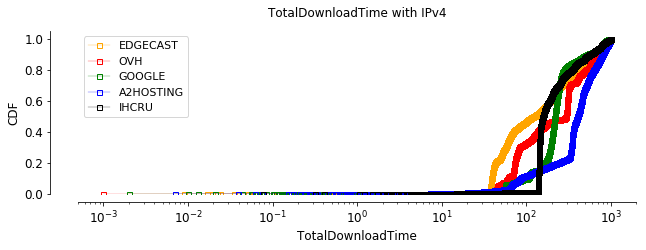

In [133]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asno_Q044.png', format='png', bbox_inches='tight')

In [137]:
quic15169 = quic43.loc[t['ASNo'] == 15169]
quic15133 = quic43.loc[t['ASNo'] == 15133]
quic203226= quic43.loc[t['ASNo'] == 203226]
quic55293 = quic43.loc[t['ASNo'] == 55293]
quic16276 = quic43.loc[t['ASNo'] == 16276]

In [138]:
x = Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [139]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:52.410000

90th Percentile:206.802000

99th Percentile:333.761000

25th Percentile:45.127000

75th Percentile:201.651000

20th Percentile:52.410000

40th Percentile:206.802000

60th Percentile:333.761000

80th Percentile:45.127000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.435000

90th Percentile:38.131000

99th Percentile:55.440000

25th Percentile:35.807000

75th Percentile:37.081000

20th Percentile:36.435000

40th Percentile:38.131000

60th Percentile:55.440000

80th Percentile:35.807000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:94.733000

90th Percentile:118.744000

99th Percentile:206.549000

25th Percentile:92.110000

75th Percentile:113.299000

20th Percentile:94.733000

40th Percentile:118.744000

60th Percentile:206.54

In [211]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

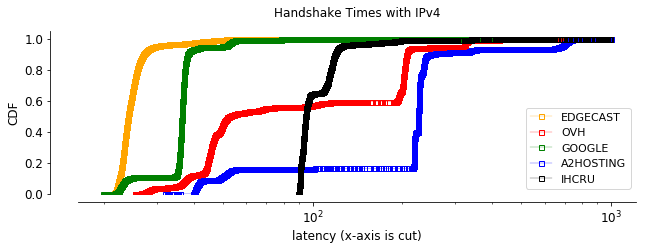

In [136]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_IPv4_asno_Q043.png', format='png', bbox_inches='tight')

In [140]:
x = Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [141]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:277.983000

90th Percentile:623.200000

99th Percentile:938.540000

25th Percentile:72.386000

75th Percentile:359.092000

20th Percentile:277.983000

40th Percentile:623.200000

60th Percentile:938.540000

80th Percentile:72.386000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:207.912000

90th Percentile:434.624000

99th Percentile:863.017000

25th Percentile:172.619000

75th Percentile:242.333000

20th Percentile:207.912000

40th Percentile:434.624000

60th Percentile:863.017000

80th Percentile:172.619000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:169.363000

90th Percentile:484.433000

99th Percentile:924.199000

25th Percentile:139.042000

75th Percentile:243.715000

20th Percentile:169.363000

40th Percentile:484.433000

60th Per

In [213]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

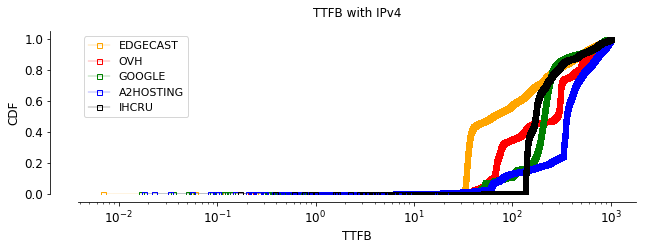

In [138]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asno_Q043.png', format='png', bbox_inches='tight')

In [142]:
x = Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [143]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:270.706000

90th Percentile:688.320000

99th Percentile:968.408000

25th Percentile:77.409000

75th Percentile:408.388000

20th Percentile:270.706000

40th Percentile:688.320000

60th Percentile:968.408000

80th Percentile:77.409000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:213.006000

90th Percentile:520.199000

99th Percentile:878.891000

25th Percentile:178.661000

75th Percentile:249.703000

20th Percentile:213.006000

40th Percentile:520.199000

60th Percentile:878.891000

80th Percentile:178.661000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:176.040000

90th Percentile:521.107000

99th Percentile:928.166000

25th Percentile:143.398000

75th Percentile:265.655000

20th Percentile:176.040000

40th Percentile:521.107000

60th Per

In [215]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

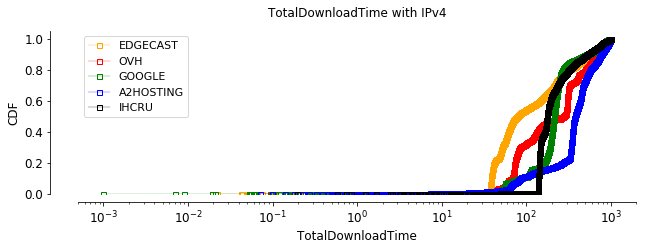

In [140]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asno_Q043.png', format='png', bbox_inches='tight')

In [144]:
quic15169 = quic39.loc[t['ASNo'] == 15169]
quic15133 = quic39.loc[t['ASNo'] == 15133]
quic203226= quic39.loc[t['ASNo'] == 203226]
quic55293 = quic39.loc[t['ASNo'] == 55293]
quic16276 = quic39.loc[t['ASNo'] == 16276]

In [145]:
x = Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [146]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:52.040000

90th Percentile:206.639000

99th Percentile:330.029000

25th Percentile:44.922000

75th Percentile:201.549000

20th Percentile:52.040000

40th Percentile:206.639000

60th Percentile:330.029000

80th Percentile:44.922000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.433000

90th Percentile:38.126000

99th Percentile:55.472000

25th Percentile:35.804000

75th Percentile:37.079000

20th Percentile:36.433000

40th Percentile:38.126000

60th Percentile:55.472000

80th Percentile:35.804000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:94.736000

90th Percentile:118.398000

99th Percentile:194.072000

25th Percentile:92.146000

75th Percentile:113.177000

20th Percentile:94.736000

40th Percentile:118.398000

60th Percentile:194.07

In [218]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

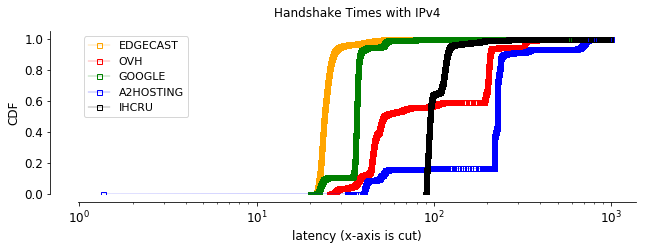

In [143]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_IPv4_asno_Q039.png', format='png', bbox_inches='tight')

In [147]:
x = Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [148]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:264.826000

90th Percentile:589.700000

99th Percentile:915.636000

25th Percentile:70.499000

75th Percentile:320.646000

20th Percentile:264.826000

40th Percentile:589.700000

60th Percentile:915.636000

80th Percentile:70.499000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:207.798000

90th Percentile:431.733000

99th Percentile:861.716000

25th Percentile:172.450000

75th Percentile:242.288000

20th Percentile:207.798000

40th Percentile:431.733000

60th Percentile:861.716000

80th Percentile:172.450000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:169.178000

90th Percentile:473.039000

99th Percentile:916.523000

25th Percentile:139.098000

75th Percentile:236.752000

20th Percentile:169.178000

40th Percentile:473.039000

60th Per

In [ ]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

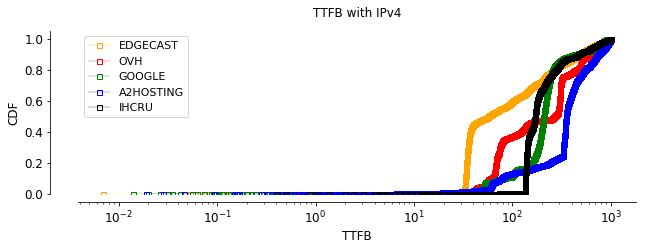

In [145]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asno_Q039.png', format='png', bbox_inches='tight')

In [149]:
x = Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [150]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:259.002000

90th Percentile:677.710000

99th Percentile:963.897000

25th Percentile:76.240000

75th Percentile:398.811000

20th Percentile:259.002000

40th Percentile:677.710000

60th Percentile:963.897000

80th Percentile:76.240000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:212.874000

90th Percentile:518.896000

99th Percentile:877.883000

25th Percentile:178.506000

75th Percentile:249.593000

20th Percentile:212.874000

40th Percentile:518.896000

60th Percentile:877.883000

80th Percentile:178.506000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:175.521000

90th Percentile:504.790000

99th Percentile:919.531000

25th Percentile:143.440000

75th Percentile:259.793000

20th Percentile:175.521000

40th Percentile:504.790000

60th Per

In [ ]:
write_percentiles('quic16276.csv', x1)
write_percentiles('quic15169.csv', x3)
write_percentiles('quic203226.csv', x4)
write_percentiles('quic55293.csv', x5)
write_percentiles('quic15133.csv', x)

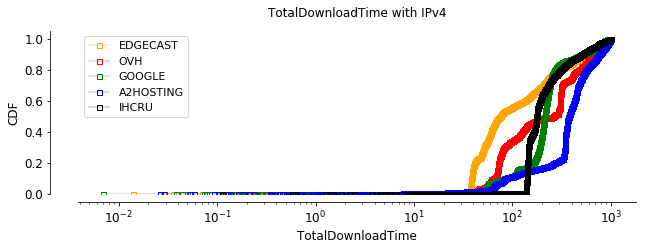

In [147]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asno_Q039.png', format='png', bbox_inches='tight')

In [151]:
quic15169 = quic35.loc[t['ASNo'] == 15169]
quic15133 = quic35.loc[t['ASNo'] == 15133]
quic203226= quic35.loc[t['ASNo'] == 203226]
quic55293 = quic35.loc[t['ASNo'] == 55293]
quic16276 = quic35.loc[t['ASNo'] == 16276]

In [152]:
x = Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [153]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:52.170000

90th Percentile:206.588000

99th Percentile:330.979000

25th Percentile:44.931000

75th Percentile:201.537000

20th Percentile:52.170000

40th Percentile:206.588000

60th Percentile:330.979000

80th Percentile:44.931000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.429000

90th Percentile:38.121000

99th Percentile:55.412000

25th Percentile:35.801000

75th Percentile:37.074000

20th Percentile:36.429000

40th Percentile:38.121000

60th Percentile:55.412000

80th Percentile:35.801000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:94.706000

90th Percentile:118.318000

99th Percentile:193.914000

25th Percentile:92.145000

75th Percentile:113.117000

20th Percentile:94.706000

40th Percentile:118.318000

60th Percentile:193.91

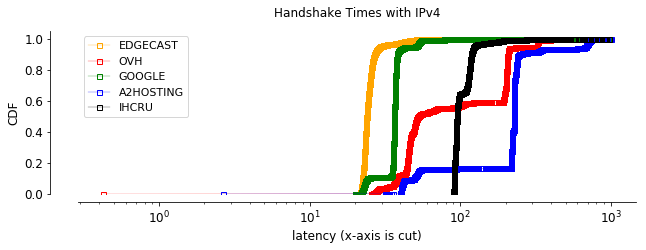

In [150]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_IPv4_asno_Q035.png', format='png', bbox_inches='tight')

In [154]:
x = Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [156]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:271.525000

90th Percentile:595.782000

99th Percentile:929.289000

25th Percentile:70.265000

75th Percentile:323.660000

20th Percentile:271.525000

40th Percentile:595.782000

60th Percentile:929.289000

80th Percentile:70.265000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:207.722000

90th Percentile:429.344000

99th Percentile:861.673000

25th Percentile:172.295000

75th Percentile:242.218000

20th Percentile:207.722000

40th Percentile:429.344000

60th Percentile:861.673000

80th Percentile:172.295000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:169.220000

90th Percentile:470.792000

99th Percentile:911.137000

25th Percentile:139.074000

75th Percentile:236.319000

20th Percentile:169.220000

40th Percentile:470.792000

60th Per

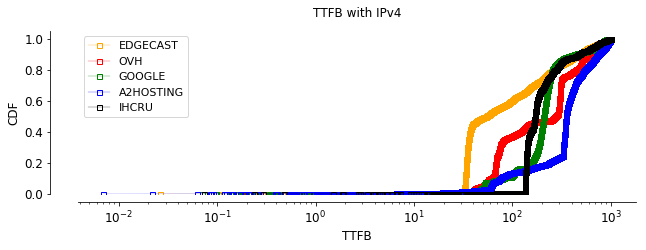

In [152]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv4_asno_Q035.png', format='png', bbox_inches='tight')

In [157]:
x = Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [158]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:264.020000

90th Percentile:682.506000

99th Percentile:970.818000

25th Percentile:76.208000

75th Percentile:402.035000

20th Percentile:264.020000

40th Percentile:682.506000

60th Percentile:970.818000

80th Percentile:76.208000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:212.803000

90th Percentile:516.994000

99th Percentile:877.113000

25th Percentile:178.348000

75th Percentile:249.499000

20th Percentile:212.803000

40th Percentile:516.994000

60th Percentile:877.113000

80th Percentile:178.348000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:175.747000

90th Percentile:504.862000

99th Percentile:914.074000

25th Percentile:143.426000

75th Percentile:258.915000

20th Percentile:175.747000

40th Percentile:504.862000

60th Per

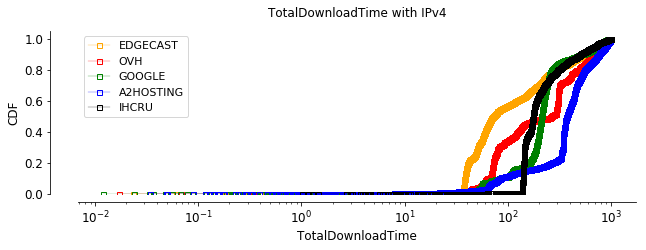

In [154]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv4_asno_Q035.png', format='png', bbox_inches='tight')

In [159]:
quic44_6 = quic6.loc[t['Protocol'] == 'Q044']
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic39_6 = quic6.loc[t['Protocol'] == 'Q039']
quic35_6 = quic6.loc[t['Protocol'] == 'Q035']

In [160]:
quic15169_6 = quic44_6.loc[t['ASNo'] == 15169]
quic15133_6 = quic44_6.loc[t['ASNo'] == 15133]
quic203226_6= quic44_6.loc[t['ASNo'] == 203226]
quic55293_6 = quic44_6.loc[t['ASNo'] == 55293]
quic16276_6 = quic44_6.loc[t['ASNo'] == 16276]

In [161]:
x = Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [162]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:202.131000

90th Percentile:204.847000

99th Percentile:217.846000

25th Percentile:195.344000

75th Percentile:203.248000

20th Percentile:202.131000

40th Percentile:204.847000

60th Percentile:217.846000

80th Percentile:195.344000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.570000

90th Percentile:38.302000

99th Percentile:54.981000

25th Percentile:36.055000

75th Percentile:37.188000

20th Percentile:36.570000

40th Percentile:38.302000

60th Percentile:54.981000

80th Percentile:36.055000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:102.738000

90th Percentile:114.389000

99th Percentile:162.140000

25th Percentile:94.014000

75th Percentile:110.419000

20th Percentile:102.738000

40th Percentile:114.389000

60th Percentile:

IndexError: list index out of range

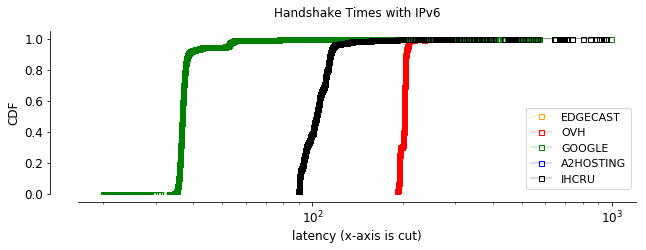

In [158]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asno_Q044.png', format='png', bbox_inches='tight')

In [163]:
x = Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [164]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:397.561000

90th Percentile:474.698000

99th Percentile:532.313000

25th Percentile:376.248000

75th Percentile:462.108000

20th Percentile:397.561000

40th Percentile:474.698000

60th Percentile:532.313000

80th Percentile:376.248000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:207.401000

90th Percentile:295.313000

99th Percentile:845.963000

25th Percentile:176.368000

75th Percentile:236.048000

20th Percentile:207.401000

40th Percentile:295.313000

60th Percentile:845.963000

80th Percentile:176.368000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:164.781000

90th Percentile:466.808000

99th Percentile:908.072000

25th Percentile:148.041000

75th Percentile:221.200000

20th Percentile:164.781000

40th Percentile:466.808000

60th P

IndexError: list index out of range

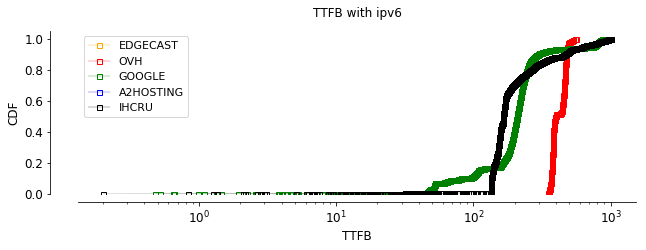

In [160]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asno_Q044.png', format='png', bbox_inches='tight')

In [165]:
x = Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [166]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:401.781000

90th Percentile:478.951000

99th Percentile:536.503000

25th Percentile:380.426000

75th Percentile:466.261000

20th Percentile:401.781000

40th Percentile:478.951000

60th Percentile:536.503000

80th Percentile:380.426000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:211.816000

90th Percentile:329.416000

99th Percentile:851.171000

25th Percentile:180.967000

75th Percentile:241.511000

20th Percentile:211.816000

40th Percentile:329.416000

60th Percentile:851.171000

80th Percentile:180.967000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:170.141000

90th Percentile:491.736000

99th Percentile:910.193000

25th Percentile:153.856000

75th Percentile:233.968000

20th Percentile:170.141000

40th Percentile:491.736000

60th P

IndexError: list index out of range

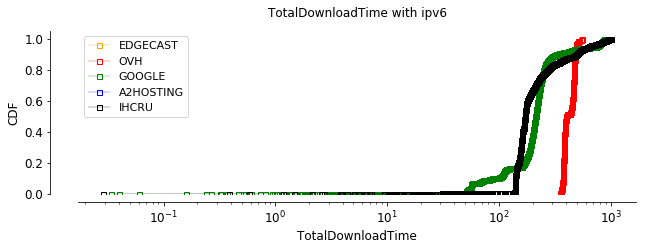

In [162]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asno_Q044.png', format='png', bbox_inches='tight')

In [167]:
quic15169_6 = quic43_6.loc[t['ASNo'] == 15169]
quic15133_6 = quic43_6.loc[t['ASNo'] == 15133]
quic203226_6= quic43_6.loc[t['ASNo'] == 203226]
quic55293_6 = quic43_6.loc[t['ASNo'] == 55293]
quic16276_6 = quic43_6.loc[t['ASNo'] == 16276]

In [168]:
x = Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [169]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:201.843000

90th Percentile:205.122000

99th Percentile:209.554000

25th Percentile:199.890000

75th Percentile:203.710000

20th Percentile:201.843000

40th Percentile:205.122000

60th Percentile:209.554000

80th Percentile:199.890000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.553000

90th Percentile:38.280000

99th Percentile:54.949000

25th Percentile:36.038000

75th Percentile:37.170000

20th Percentile:36.553000

40th Percentile:38.280000

60th Percentile:54.949000

80th Percentile:36.038000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:96.680000

90th Percentile:113.216000

99th Percentile:148.921000

25th Percentile:91.111000

75th Percentile:106.896000

20th Percentile:96.680000

40th Percentile:113.216000

60th Percentile:14

IndexError: list index out of range

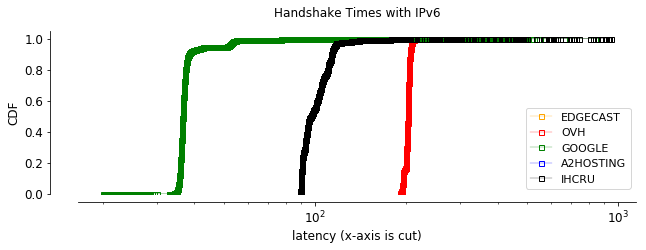

In [165]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asno_Q043.png', format='png', bbox_inches='tight')

In [170]:
x = Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [171]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:437.660000

90th Percentile:496.075000

99th Percentile:521.029000

25th Percentile:381.103000

75th Percentile:472.117000

20th Percentile:437.660000

40th Percentile:496.075000

60th Percentile:521.029000

80th Percentile:381.103000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:206.582000

90th Percentile:289.878000

99th Percentile:843.219000

25th Percentile:175.701000

75th Percentile:234.801000

20th Percentile:206.582000

40th Percentile:289.878000

60th Percentile:843.219000

80th Percentile:175.701000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:159.379000

90th Percentile:468.736000

99th Percentile:919.756000

25th Percentile:138.376000

75th Percentile:214.231000

20th Percentile:159.379000

40th Percentile:468.736000

60th P

IndexError: list index out of range

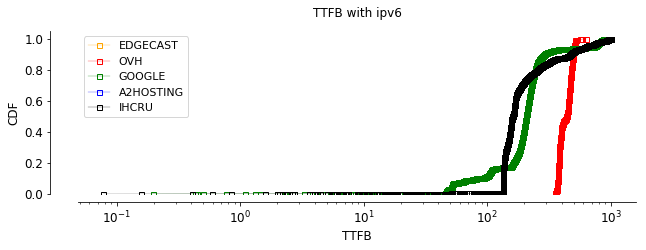

In [167]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asno_Q043.png', format='png', bbox_inches='tight')

In [172]:
x = Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [173]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:441.918000

90th Percentile:500.316000

99th Percentile:525.218000

25th Percentile:385.440000

75th Percentile:476.256000

20th Percentile:441.918000

40th Percentile:500.316000

60th Percentile:525.218000

80th Percentile:385.440000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:210.996000

90th Percentile:319.600000

99th Percentile:848.454000

25th Percentile:180.287000

75th Percentile:240.250000

20th Percentile:210.996000

40th Percentile:319.600000

60th Percentile:848.454000

80th Percentile:180.287000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:168.295000

90th Percentile:492.947000

99th Percentile:918.388000

25th Percentile:142.940000

75th Percentile:228.558000

20th Percentile:168.295000

40th Percentile:492.947000

60th P

IndexError: list index out of range

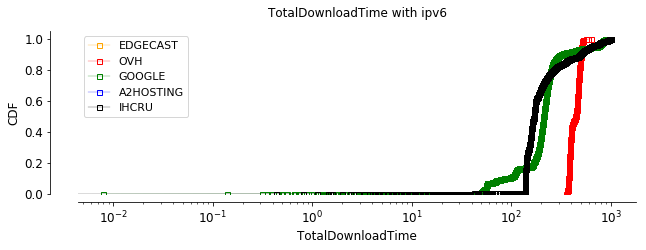

In [169]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asno_Q043.png', format='png', bbox_inches='tight')

In [174]:
quic15169_6 = quic39_6.loc[t['ASNo'] == 15169]
quic15133_6 = quic39_6.loc[t['ASNo'] == 15133]
quic203226_6= quic39_6.loc[t['ASNo'] == 203226]
quic55293_6 = quic39_6.loc[t['ASNo'] == 55293]
quic16276_6 = quic39_6.loc[t['ASNo'] == 16276]

In [175]:
x = Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [176]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:201.899000

90th Percentile:206.001000

99th Percentile:209.376000

25th Percentile:199.769000

75th Percentile:203.878000

20th Percentile:201.899000

40th Percentile:206.001000

60th Percentile:209.376000

80th Percentile:199.769000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.552000

90th Percentile:38.277000

99th Percentile:54.929000

25th Percentile:36.038000

75th Percentile:37.168000

20th Percentile:36.552000

40th Percentile:38.277000

60th Percentile:54.929000

80th Percentile:36.038000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:96.451000

90th Percentile:113.255000

99th Percentile:139.904000

25th Percentile:90.943000

75th Percentile:107.047000

20th Percentile:96.451000

40th Percentile:113.255000

60th Percentile:13

IndexError: list index out of range

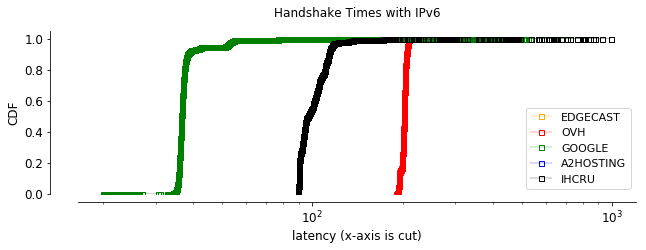

In [172]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asno_Q039.png', format='png', bbox_inches='tight')

In [177]:
x = Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [178]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:390.724000

90th Percentile:481.971000

99th Percentile:503.060000

25th Percentile:377.538000

75th Percentile:463.343000

20th Percentile:390.724000

40th Percentile:481.971000

60th Percentile:503.060000

80th Percentile:377.538000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:206.537000

90th Percentile:289.592000

99th Percentile:842.856000

25th Percentile:175.654000

75th Percentile:234.807000

20th Percentile:206.537000

40th Percentile:289.592000

60th Percentile:842.856000

80th Percentile:175.654000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:159.920000

90th Percentile:468.598000

99th Percentile:914.434000

25th Percentile:138.360000

75th Percentile:213.100000

20th Percentile:159.920000

40th Percentile:468.598000

60th P

IndexError: list index out of range

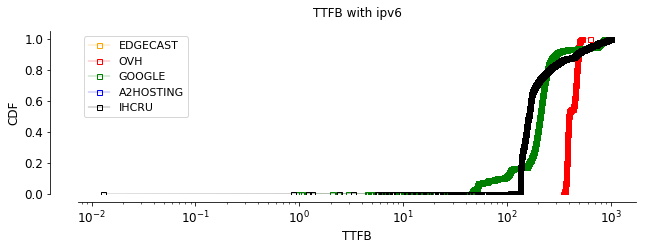

In [174]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asno_Q039.png', format='png', bbox_inches='tight')

In [179]:
x = Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [180]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:394.900000

90th Percentile:486.138000

99th Percentile:507.183000

25th Percentile:381.774000

75th Percentile:467.597000

20th Percentile:394.900000

40th Percentile:486.138000

60th Percentile:507.183000

80th Percentile:381.774000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:210.944000

90th Percentile:319.439000

99th Percentile:848.026000

25th Percentile:180.233000

75th Percentile:240.253000

20th Percentile:210.944000

40th Percentile:319.439000

60th Percentile:848.026000

80th Percentile:180.233000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:168.403000

90th Percentile:493.387000

99th Percentile:918.081000

25th Percentile:142.982000

75th Percentile:227.929000

20th Percentile:168.403000

40th Percentile:493.387000

60th P

IndexError: list index out of range

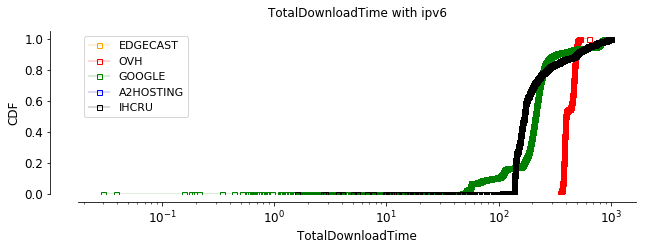

In [176]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asno_Q039.png', format='png', bbox_inches='tight')

In [181]:
quic15169_6 = quic35_6.loc[t['ASNo'] == 15169]
quic15133_6 = quic35_6.loc[t['ASNo'] == 15133]
quic203226_6= quic35_6.loc[t['ASNo'] == 203226]
quic55293_6 = quic35_6.loc[t['ASNo'] == 55293]
quic16276_6 = quic35_6.loc[t['ASNo'] == 16276]

In [182]:
x = Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [183]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:202.040000

90th Percentile:205.520000

99th Percentile:209.162000

25th Percentile:199.799000

75th Percentile:203.656000

20th Percentile:202.040000

40th Percentile:205.520000

60th Percentile:209.162000

80th Percentile:199.799000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:36.550000

90th Percentile:38.275000

99th Percentile:54.928000

25th Percentile:36.036000

75th Percentile:37.165000

20th Percentile:36.550000

40th Percentile:38.275000

60th Percentile:54.928000

80th Percentile:36.036000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:96.546000

90th Percentile:113.279000

99th Percentile:140.290000

25th Percentile:90.975000

75th Percentile:107.089000

20th Percentile:96.546000

40th Percentile:113.279000

60th Percentile:14

IndexError: list index out of range

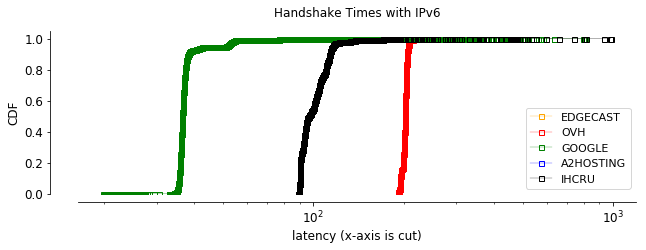

In [179]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/handshake_times_ipv6_asno_Q035.png', format='png', bbox_inches='tight')

In [184]:
x = Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [185]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:434.504000

90th Percentile:477.167000

99th Percentile:501.387000

25th Percentile:378.932000

75th Percentile:462.303000

20th Percentile:434.504000

40th Percentile:477.167000

60th Percentile:501.387000

80th Percentile:378.932000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:206.537000

90th Percentile:289.136000

99th Percentile:842.911000

25th Percentile:175.655000

75th Percentile:234.748000

20th Percentile:206.537000

40th Percentile:289.136000

60th Percentile:842.911000

80th Percentile:175.655000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:160.015000

90th Percentile:468.083000

99th Percentile:907.376000

25th Percentile:138.361000

75th Percentile:212.421000

20th Percentile:160.015000

40th Percentile:468.083000

60th P

IndexError: list index out of range

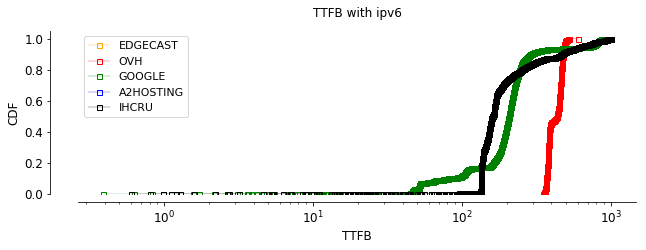

In [181]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TTFB_ipv6_asno_Q035.png', format='png', bbox_inches='tight')

In [186]:
x = Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic16276_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [187]:
print_percentiles(x1, 'quic16276')
print_percentiles(x3, 'quic15169')
print_percentiles(x4, 'quic203226')
print_percentiles(x5, 'quic55293')
print_percentiles(x, 'quic15133')

-----------------------------

percentile values distribution for quic16276

50th Percentile:438.725000

90th Percentile:481.374000

99th Percentile:505.529000

25th Percentile:383.123000

75th Percentile:466.468000

20th Percentile:438.725000

40th Percentile:481.374000

60th Percentile:505.529000

80th Percentile:383.123000

-----------------------------

-----------------------------

percentile values distribution for quic15169

50th Percentile:210.944000

90th Percentile:318.525000

99th Percentile:848.040000

25th Percentile:180.216000

75th Percentile:240.205000

20th Percentile:210.944000

40th Percentile:318.525000

60th Percentile:848.040000

80th Percentile:180.216000

-----------------------------

-----------------------------

percentile values distribution for quic203226

50th Percentile:168.431000

90th Percentile:493.142000

99th Percentile:910.634000

25th Percentile:142.911000

75th Percentile:226.830000

20th Percentile:168.431000

40th Percentile:493.142000

60th P

IndexError: list index out of range

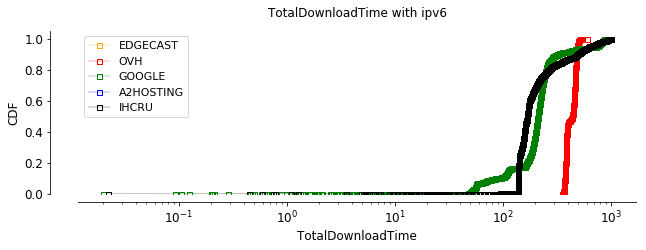

In [183]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15133
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#16276
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#15169
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#55293
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#203226
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['EDGECAST', 'OVH', 'GOOGLE', 'A2HOSTING', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with ipv6', fontsize=12, y=1.05)
plt.savefig('./plots/VM/TotalDownloadTime_ipv6_asno_Q035.png', format='png', bbox_inches='tight')